In [ ]:
import numpy as np
from scipy.stats import t, expon
import torch
import torch.nn as nn
import matplotlib.pyplot as plt
from TruncatedNormal import TruncatedNormal
import matplotlib.pyplot as plt
from sampler_newmodel import *


## Diagnostics of the Sampler

In [8]:
T=100
r=np.load("./data/r.npy")
eps_truth=np.load("./data/eps_truth.npy")
print(r.shape)
beta_r=0.2
alpha_r=0.2
params=(alpha_r, beta_r, 6.0, 1, 0.4, 0.1, 0.02, 2.5)
sampler=TEST_SAMPLER(T,params,path='./pth/VIScaler_test1_9.pth',debug=True)

(300, 1)


### ESS plot





----Debug Information of Epoch 18:
ESS: 9.791915450381513
Weights min: 2.295403519494956e-20 max: 0.24437867395655086
rpast: [-5.84148518] rcurrent: [-0.98150312]
Index of largest point: 495
eps[index]: -2.3883745113784904 eps_min: -2.433383289950573 eps_max: -1.8337990681106682
eps_past[index]: -6.5501723262188865 eps_past_min: -7.178651806962295 eps_max: -6.45165264333467
output1[index]: tensor([1.0078], grad_fn=<SelectBackward0>)
output2[index]: tensor([0.0787], grad_fn=<SelectBackward0>)




----Debug Information of Epoch 40:
ESS: 6121.645077032375
Weights min: 6.176856808081292e-09 max: 0.00123900660702375
rpast: [-0.48851438] rcurrent: [-0.82261338]
Index of largest point: 6645
eps[index]: -1.7095107183121807 eps_min: -1.7754647478722698 eps_max: -1.0379535004758007
eps_past[index]: -1.2026540326684674 eps_past_min: -1.5398590850442608 eps_max: -0.7204413103669843
output1[index]: tensor([0.4206], grad_fn=<SelectBackward0>)
output2[index]: tensor([0.0962], grad_fn=<SelectBackw

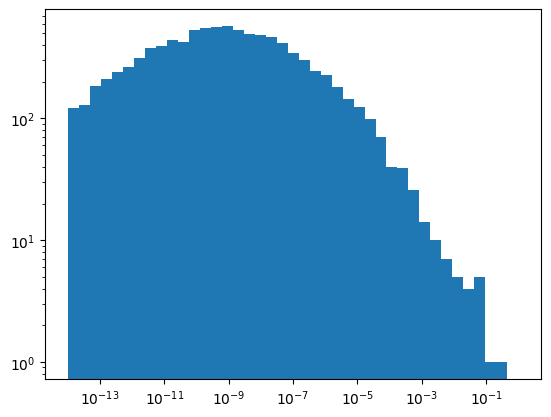

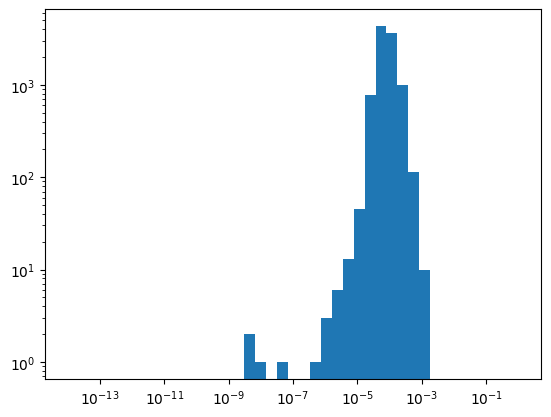

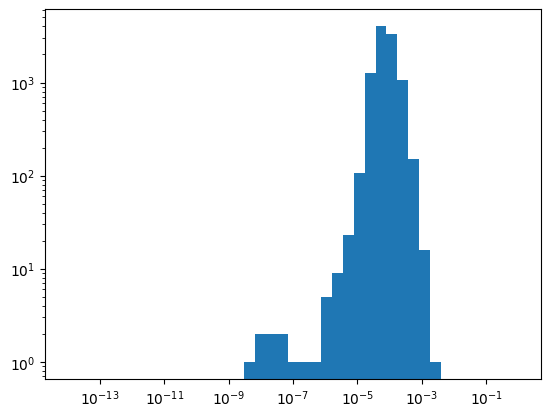

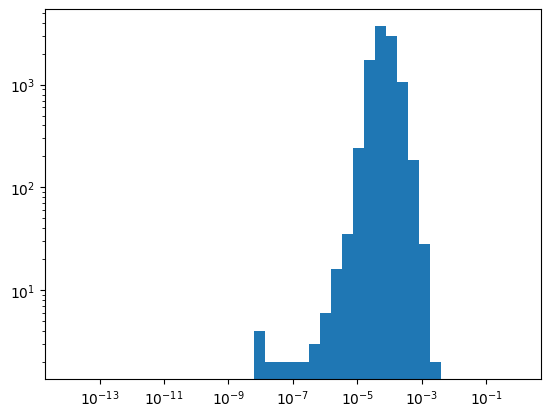

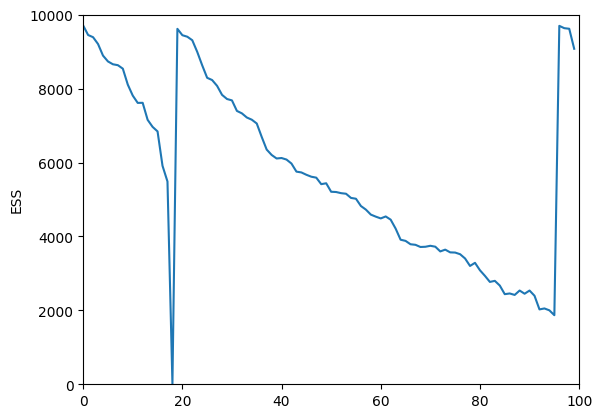

<Figure size 640x480 with 0 Axes>

In [9]:
samples,weights=sampler.sample(10000,r,resample_thre=0.2,checklist=[40,50,60])
sampler.plot_ESS()

In [ ]:
sampler.ESS_list

### Histogram of the last entry

In [ ]:
i=31
index = np.random.choice(list(range(len(weights))), p=weights, size=(len(weights)))
plt.hist((samples[:,i])[index], density=True, bins=40, label="sampled")
plt.axvline(x=r[i]-alpha_r,ls="--",c="C1",label=r"$r_t-\alpha_r$")
plt.axvline(x=eps_truth[i],ls="--",c="C2",label=r"Truth $\epsilon_t$")
plt.title(f"$t={i+1}$")
plt.legend()
plt.show()


### Unique values

In [ ]:
plt.figure()
unique_val=[]
for t in range(T):
    unique_val.append(np.unique(samples[:,t][index]).shape[0])

# plt.show()
#print(unique_val)
plt.plot(unique_val)
plt.title("Unique values")
plt.xlabel("t")
plt.yscale("log")
plt.show()

Check if the variational distribution matches the truth posterior distirbution

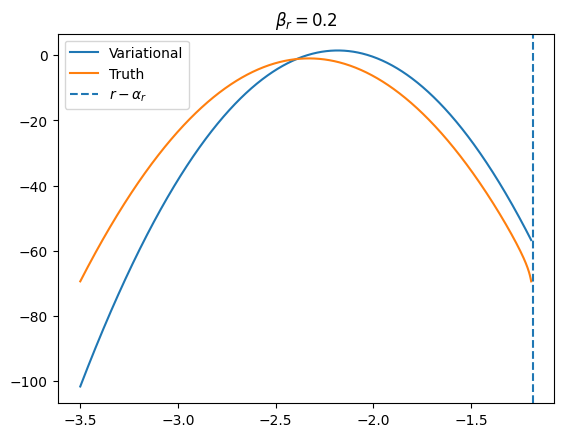

In [10]:

N=1000

r=-0.98150312
r_past=-5.84148518
eps=torch.linspace(-3.5,r-alpha_r-0.01,N)
eps_past=r_past-alpha_r-1e-2-0.1*torch.ones_like(eps)#torch.rand_like(eps)
log_prob=sampler.log_policy_density(eps=eps,eps_past=eps_past,rr=r,r_past=r_past)
log_prob_truth=sampler.log_likelihood_update(epsilon=eps.detach().numpy(),r=r,epsilon_past=eps_past.detach().numpy(),r_past=r_past)
plt.plot(eps,log_prob.detach().numpy(),label="Variational")
plt.plot(eps,log_prob_truth,label='Truth')
plt.title(r"$\beta_r=$"+f"{beta_r}")
plt.axvline(x=r-alpha_r,ls="--",label=r"$r-\alpha_r$")
plt.legend()
plt.show()